In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Object Creation (객체 생성)

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [9]:
s # int 사이에 NaN이 있으면 float으로 바뀌는 것을 볼 수 있다

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
s.dtype

dtype('float64')

In [10]:
s.size

6

In [11]:
s.shape

(6,)

In [83]:
dates = pd.date_range('20130101', periods = 6)
# periods : 시작 날짜로부터 6개 연속된 날짜 생성

In [14]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [17]:
df

,A,B,C,D
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-04,-2.023194,2.050069,0.744337,1.699537
2013-01-05,-0.109094,2.413611,-0.907910,0.936443
2013-01-06,0.548813,-2.136186,0.378242,1.024798


In [18]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [19]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [20]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [26]:
# A열
print(1.)
print(type(1.))
# B열
print(pd.Timestamp('20130102'))
print(type(pd.Timestamp('20130102')))
# C열 
print(pd.Series(1, index=list(range(4)), dtype='float32'))

1.0
<class 'float'>
2013-01-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32


In [39]:
# D열
np.array([3]*4)

array([3, 3, 3, 3])

## Viewing Data (데이터 확인하기)

In [50]:
df.head()

,A,B,C,D
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-04,-2.023194,2.050069,0.744337,1.699537
2013-01-05,-0.109094,2.413611,-0.907910,0.936443


In [51]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.109094,2.413611,-0.907910,0.936443
2013-01-06,0.548813,-2.136186,0.378242,1.024798


In [52]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [53]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [54]:
df.values

array([[ 0.75128322, -0.74533179, -1.4115172 , -0.23319217],
       [-1.00651688, -1.17644547, -0.35427327,  0.11552896],
       [ 1.2685389 , -2.11413956,  0.20327514, -1.01390253],
       [-2.02319391,  2.05006887,  0.74433745,  1.69953681],
       [-0.1090936 ,  2.41361099, -0.90790984,  0.93644313],
       [ 0.54881345, -2.13618613,  0.37824221,  1.02479834]])

In [57]:
df2.describe()
# mean 평균, std 표준편차

,A,B,C,D
count,4.0,4,4.0,4.0
mean,1.0,2013-01-02 00:00:00,1.0,3.0
min,1.0,2013-01-02 00:00:00,1.0,3.0
25%,1.0,2013-01-02 00:00:00,1.0,3.0
50%,1.0,2013-01-02 00:00:00,1.0,3.0
75%,1.0,2013-01-02 00:00:00,1.0,3.0
max,1.0,2013-01-02 00:00:00,1.0,3.0
std,0.0,NaN,0.0,0.0


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


In [59]:
df.T # 데이터를 전치

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.751283,-1.006517,1.268539,-2.023194,-0.109094,0.548813
B,-0.745332,-1.176445,-2.114140,2.050069,2.413611,-2.136186
C,-1.411517,-0.354273,0.203275,0.744337,-0.907910,0.378242
D,-0.233192,0.115529,-1.013903,1.699537,0.936443,1.024798


In [71]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.233192,-1.411517,-0.745332,0.751283
2013-01-02,0.115529,-0.354273,-1.176445,-1.006517
2013-01-03,-1.013903,0.203275,-2.114140,1.268539
2013-01-04,1.699537,0.744337,2.050069,-2.023194
2013-01-05,0.936443,-0.907910,2.413611,-0.109094
2013-01-06,1.024798,0.378242,-2.136186,0.548813


In [72]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.548813,-2.136186,0.378242,1.024798
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-04,-2.023194,2.050069,0.744337,1.699537
2013-01-05,-0.109094,2.413611,-0.907910,0.936443


In [73]:
df.index.name = 'date'

In [79]:
df.sort_values(by='date')

,A,B,C,D
date,,,,
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-04,-2.023194,2.050069,0.744337,1.699537
2013-01-05,-0.109094,2.413611,-0.907910,0.936443
2013-01-06,0.548813,-2.136186,0.378242,1.024798


In [80]:
df.sort_values(by='20130105', axis=1, ascending=False)

,B,D,A,C
date,,,,
2013-01-01,-0.745332,-0.233192,0.751283,-1.411517
2013-01-02,-1.176445,0.115529,-1.006517,-0.354273
2013-01-03,-2.114140,-1.013903,1.268539,0.203275
2013-01-04,2.050069,1.699537,-2.023194,0.744337
2013-01-05,2.413611,0.936443,-0.109094,-0.907910
2013-01-06,-2.136186,1.024798,0.548813,0.378242


## Selection (선택)

### Getting (데이터 얻기)

In [78]:
df['A']

date
2013-01-01    0.751283
2013-01-02   -1.006517
2013-01-03    1.268539
2013-01-04   -2.023194
2013-01-05   -0.109094
2013-01-06    0.548813
Freq: D, Name: A, dtype: float64

In [81]:
df[0:3]

,A,B,C,D
date,,,,
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903


In [82]:
df['20130102':'20130104']

,A,B,C,D
date,,,,
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-04,-2.023194,2.050069,0.744337,1.699537


### Selection by Label (Label을 통한 선택)

In [84]:
df.loc[dates[0]]

A    0.751283
B   -0.745332
C   -1.411517
D   -0.233192
Name: 2013-01-01 00:00:00, dtype: float64

In [85]:
df.loc['20130101']

A    0.751283
B   -0.745332
C   -1.411517
D   -0.233192
Name: 2013-01-01 00:00:00, dtype: float64

In [86]:
df.loc[:, ['A', 'B']]

,A,B
date,,
2013-01-01,0.751283,-0.745332
2013-01-02,-1.006517,-1.176445
2013-01-03,1.268539,-2.114140
2013-01-04,-2.023194,2.050069
2013-01-05,-0.109094,2.413611
2013-01-06,0.548813,-2.136186


In [90]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
date,,
2013-01-02,-1.006517,-1.176445
2013-01-03,1.268539,-2.114140
2013-01-04,-2.023194,2.050069


In [91]:
df.loc['20130102',['A','B']]

A   -1.006517
B   -1.176445
Name: 2013-01-02 00:00:00, dtype: float64

In [92]:
df.loc[dates[0],'A']

0.7512832196695828

In [87]:
df.iloc[2, 1]

-2.1141395562456076

In [88]:
df.at['2013-01-03', 'B']
# 스칼라 값을 더 빠르게 구하는 방법 (at)

-2.1141395562456076

### Selection by Position (위치로 선택하기)

In [89]:
df.iat[2, 1]

-2.1141395562456076

In [94]:
df.iloc[3]

A   -2.023194
B    2.050069
C    0.744337
D    1.699537
Name: 2013-01-04 00:00:00, dtype: float64

In [95]:
df.iloc[3:5,0:2]

,A,B
date,,
2013-01-04,-2.023194,2.050069
2013-01-05,-0.109094,2.413611


In [96]:
df.iloc[[1,2,4],[0,2]]

,A,C
date,,
2013-01-02,-1.006517,-0.354273
2013-01-03,1.268539,0.203275
2013-01-05,-0.109094,-0.907910


In [97]:
df.iloc[1:3,:]

,A,B,C,D
date,,,,
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903


In [98]:
df.iloc[:,1:3]

,B,C
date,,
2013-01-01,-0.745332,-1.411517
2013-01-02,-1.176445,-0.354273
2013-01-03,-2.114140,0.203275
2013-01-04,2.050069,0.744337
2013-01-05,2.413611,-0.907910
2013-01-06,-2.136186,0.378242


In [99]:
df.iloc[1,1]

-1.1764454683430783

### Boolean Indexing
데이터를 선택하기 위해 단일 열의 값을 사용

In [100]:
df[df.A > 0]

,A,B,C,D
date,,,,
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-06,0.548813,-2.136186,0.378242,1.024798


In [102]:
df.A > 0
# True인 것만 뱉어냄

date
2013-01-01     True
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05    False
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [103]:
df[df > 0]

,A,B,C,D
date,,,,
2013-01-01,0.751283,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,0.115529
2013-01-03,1.268539,NaN,0.203275,NaN
2013-01-04,NaN,2.050069,0.744337,1.699537
2013-01-05,NaN,2.413611,NaN,0.936443
2013-01-06,0.548813,NaN,0.378242,1.024798


In [104]:
df
# 위에꺼랑 비교하려고 만듬

,A,B,C,D
date,,,,
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-04,-2.023194,2.050069,0.744337,1.699537
2013-01-05,-0.109094,2.413611,-0.907910,0.936443
2013-01-06,0.548813,-2.136186,0.378242,1.024798


In [109]:
df[(df['A']>0) & (df['C']>0)]
# 연산자 우선순위 때문에 & 연산을 하려면 괄호로 묶어줘야 함
# A열의 값이 양수, C의 값이 양수

,A,B,C,D
date,,,,
2013-01-03,1.268539,-2.114140,0.203275,-1.013903
2013-01-06,0.548813,-2.136186,0.378242,1.024798


In [111]:
df[~(df['A']>0)]
# Not은 '~' 이다

,A,B,C,D
date,,,,
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529
2013-01-04,-2.023194,2.050069,0.744337,1.699537
2013-01-05,-0.109094,2.413611,-0.907910,0.936443


In [112]:
df2 = df.copy()

In [114]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [115]:
df2

,A,B,C,D,E
date,,,,,
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192,one
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529,one
2013-01-03,1.268539,-2.114140,0.203275,-1.013903,two
2013-01-04,-2.023194,2.050069,0.744337,1.699537,three
2013-01-05,-0.109094,2.413611,-0.907910,0.936443,four
2013-01-06,0.548813,-2.136186,0.378242,1.024798,three


In [117]:
df2[df2['E'].isin(['two','four'])]
# 필터링을 위한 메소드 isin()

,A,B,C,D,E
date,,,,,
2013-01-03,1.268539,-2.114140,0.203275,-1.013903,two
2013-01-05,-0.109094,2.413611,-0.907910,0.936443,four


In [118]:
df2[~df2['E'].isin(['one','three'])]
# ~을 이용하여 NOT(부정)

,A,B,C,D,E
date,,,,,
2013-01-03,1.268539,-2.114140,0.203275,-1.013903,two
2013-01-05,-0.109094,2.413611,-0.907910,0.936443,four


### Setting (설정)
새 열을 설정하면 데이터가 인덱스 별로 자동 정렬 됩니다.

In [119]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [120]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [123]:
df['F'] = s1

In [124]:
df

,A,B,C,D,F
date,,,,,
2013-01-01,0.751283,-0.745332,-1.411517,-0.233192,NaN
2013-01-02,-1.006517,-1.176445,-0.354273,0.115529,1.0
2013-01-03,1.268539,-2.114140,0.203275,-1.013903,2.0
2013-01-04,-2.023194,2.050069,0.744337,1.699537,3.0
2013-01-05,-0.109094,2.413611,-0.907910,0.936443,4.0
2013-01-06,0.548813,-2.136186,0.378242,1.024798,5.0


In [128]:
df.at[dates[0], 'A'] = 0
# 라벨에 의해 값을 설정

In [129]:
df.iat[0, 1] = 0
# 위치에 의해 값을 설정

In [143]:
len(df)

6

In [149]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [150]:
# NumPy 배열을 사용한 할당에 의해 값을 설정합니다.
df.loc[:, 'D'] = np.array([5] * len(df))

In [151]:
df

,A,B,C,D,F
date,,,,,
2013-01-01,0.000000,0.000000,-1.411517,5,NaN
2013-01-02,-1.006517,-1.176445,-0.354273,5,1.0
2013-01-03,1.268539,-2.114140,0.203275,5,2.0
2013-01-04,-2.023194,2.050069,0.744337,5,3.0
2013-01-05,-0.109094,2.413611,-0.907910,5,4.0
2013-01-06,0.548813,-2.136186,0.378242,5,5.0


In [160]:
df['D'] = df['D'].astype(int) # 5.0으로 나오면 D의 열을 int(정수형)으로 변환

In [161]:
df

,A,B,C,D,F
date,,,,,
2013-01-01,0.000000,0.000000,-1.411517,5,NaN
2013-01-02,-1.006517,-1.176445,-0.354273,5,1.0
2013-01-03,1.268539,-2.114140,0.203275,5,2.0
2013-01-04,-2.023194,2.050069,0.744337,5,3.0
2013-01-05,-0.109094,2.413611,-0.907910,5,4.0
2013-01-06,0.548813,-2.136186,0.378242,5,5.0


In [162]:
df.dtypes

A    float64
B    float64
C    float64
D      int32
F    float64
dtype: object

In [164]:
# Where 연산을 설정합니다.
df2 = df.copy()
df2[df2 > 0] = -df2

In [165]:
df2

,A,B,C,D,F
date,,,,,
2013-01-01,0.000000,0.000000,-1.411517,-5,NaN
2013-01-02,-1.006517,-1.176445,-0.354273,-5,-1.0
2013-01-03,-1.268539,-2.114140,-0.203275,-5,-2.0
2013-01-04,-2.023194,-2.050069,-0.744337,-5,-3.0
2013-01-05,-0.109094,-2.413611,-0.907910,-5,-4.0
2013-01-06,-0.548813,-2.136186,-0.378242,-5,-5.0


In [167]:
-df

,A,B,C,D,F
date,,,,,
2013-01-01,-0.000000,-0.000000,1.411517,-5,NaN
2013-01-02,1.006517,1.176445,0.354273,-5,-1.0
2013-01-03,-1.268539,2.114140,-0.203275,-5,-2.0
2013-01-04,2.023194,-2.050069,-0.744337,-5,-3.0
2013-01-05,0.109094,-2.413611,0.907910,-5,-4.0
2013-01-06,-0.548813,2.136186,-0.378242,-5,-5.0


## Missing Data (결측치)

In [173]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1

In [174]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.411517,5,NaN,1.0
2013-01-02,-1.006517,-1.176445,-0.354273,5,1.0,1.0
2013-01-03,1.268539,-2.114140,0.203275,5,2.0,NaN
2013-01-04,-2.023194,2.050069,0.744337,5,3.0,NaN


결측치를 가지고 있는 행들을 제거

In [175]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.006517,-1.176445,-0.354273,5,1.0,1.0


결측치를 채워 넣습니다.

In [177]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.411517,5,5.0,1.0
2013-01-02,-1.006517,-1.176445,-0.354273,5,1.0,1.0
2013-01-03,1.268539,-2.114140,0.203275,5,2.0,5.0
2013-01-04,-2.023194,2.050069,0.744337,5,3.0,5.0


isna() : 데이터 프레임의 모든 값이 Boolean 형태로 표시되도록 하며  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nan인 값에만 True가 표시되게 하는 함수

In [186]:
pd.isna(df1)  # 판다스의 메소드

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [187]:
df1.isnull()   # 데이터 프레임의 메소드

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [183]:
# df1.fillna(value=5, inplace=True)
#inplace=True를 하면 데이터 값이 반영됨

## Operation (연산)
### stats (통계)

In [188]:
df.mean()    # 열(axis=0) 평균

A   -0.220242
B   -0.160515
C   -0.224641
D    5.000000
F    3.000000
dtype: float64

In [191]:
df.mean(1)   # 행(axis=1) 평균

date
2013-01-01    0.897121
2013-01-02    0.692553
2013-01-03    1.271535
2013-01-04    1.754242
2013-01-05    2.079322
2013-01-06    1.758174
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.   
역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

In [196]:
pd.Series([1,3,5,np.nan,6,8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [195]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [199]:
df

,A,B,C,D,F
date,,,,,
2013-01-01,0.000000,0.000000,-1.411517,5,NaN
2013-01-02,-1.006517,-1.176445,-0.354273,5,1.0
2013-01-03,1.268539,-2.114140,0.203275,5,2.0
2013-01-04,-2.023194,2.050069,0.744337,5,3.0
2013-01-05,-0.109094,2.413611,-0.907910,5,4.0
2013-01-06,0.548813,-2.136186,0.378242,5,5.0


In [200]:
df.sub(s, axis='index')
# sub : df와 s의 '-'(차) 를 구한 연산

,A,B,C,D,F
date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.268539,-3.114140,-0.796725,4.0,1.0
2013-01-04,-5.023194,-0.949931,-2.255663,2.0,0.0
2013-01-05,-5.109094,-2.586389,-5.907910,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply (적용)
데이터에 함수를 적용합니다.

In [207]:
df.apply(np.cumsum)
# cumsum = 배열의 누적합

,A,B,C,D,F
date,,,,,
2013-01-01,0.000000,0.000000,-1.411517,5,NaN
2013-01-02,-1.006517,-1.176445,-1.765790,10,1.0
2013-01-03,0.262022,-3.290585,-1.562515,15,3.0
2013-01-04,-1.761172,-1.240516,-0.818178,20,6.0
2013-01-05,-1.870265,1.173095,-1.726088,25,10.0
2013-01-06,-1.321452,-0.963091,-1.347846,30,15.0


In [208]:
df.apply(lambda x: np.cumsum(x))

,A,B,C,D,F
date,,,,,
2013-01-01,0.000000,0.000000,-1.411517,5,NaN
2013-01-02,-1.006517,-1.176445,-1.765790,10,1.0
2013-01-03,0.262022,-3.290585,-1.562515,15,3.0
2013-01-04,-1.761172,-1.240516,-0.818178,20,6.0
2013-01-05,-1.870265,1.173095,-1.726088,25,10.0
2013-01-06,-1.321452,-0.963091,-1.347846,30,15.0


In [209]:
df.apply(lambda x: x.max() - x.min())
# 각 열의 최대값 - 최소값

A    3.291733
B    4.549797
C    2.155855
D    0.000000
F    4.000000
dtype: float64

### Histogramming (히스토그래밍)

In [236]:
s = pd.Series(np.random.randint(0, 7, size=10))
# 랜덤0~7 정수를 10개 생성

In [237]:
s

0    3
1    3
2    4
3    4
4    5
5    6
6    2
7    5
8    0
9    5
dtype: int32

In [238]:
s.values

array([3, 3, 4, 4, 5, 6, 2, 5, 0, 5])

In [239]:
s.value_counts() # 동일값 count

5    3
3    2
4    2
6    1
2    1
0    1
Name: count, dtype: int64

In [240]:
s.unique

<bound method Series.unique of 0    3
1    3
2    4
3    4
4    5
5    6
6    2
7    5
8    0
9    5
dtype: int32>

<Axes: >

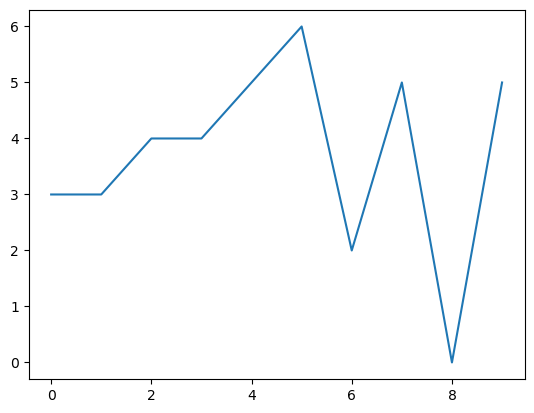

In [241]:
s.plot()

<Axes: >

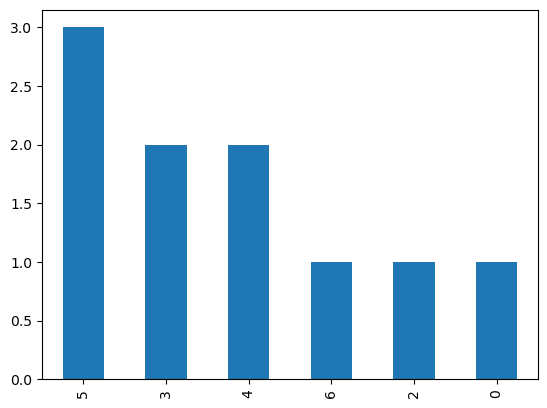

In [244]:
s.value_counts().plot(kind='bar')

<Axes: >

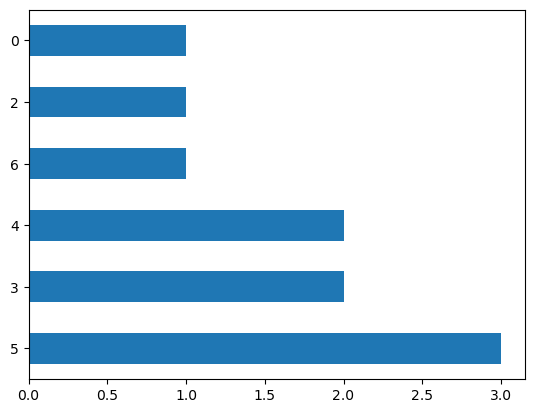

In [245]:
s.value_counts().plot(kind='barh')

<Axes: ylabel='Frequency'>

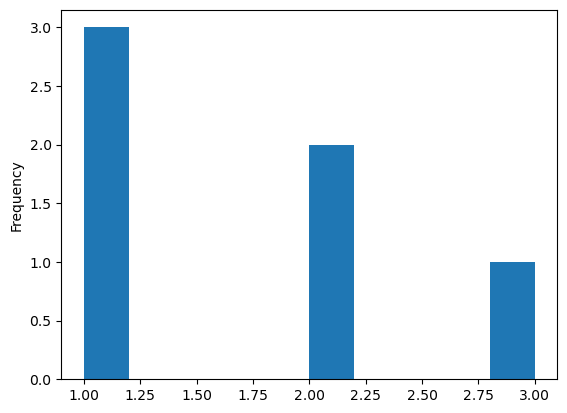

In [261]:
s.value_counts().plot(kind='hist')
# 'line': 선 그래프
# 'bar': 막대 그래프
# 'barh': 수평 막대 그래프
# 'hist': 히스토그램
# 'box': 상자 그림
# 'kde': 커널 밀도 그래프
# 'density': 밀도 그래프
# 'area': 면적 그래프
# 'pie': 파이 차트
# 'scatter': 산점도
# 'hexbin': 육각 그래프

### String Methods (문자열 메소드)

In [262]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [264]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [269]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

## Merge(병합)

### Concat(연결)
>결합(join) / 병합(merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공합니다.

In [270]:
df = pd.DataFrame(np.random.randn(10, 4)) # 10행 4열 랜덤

In [271]:
df

,0,1,2,3
0,-0.037163,0.579361,-0.133530,-0.992293
1,0.767072,0.605784,0.922907,0.619652
2,0.529870,0.540260,-0.389324,0.779551
3,0.514075,-0.772132,0.644815,0.822652
4,0.967304,2.552192,2.102478,-1.451967
5,1.034409,0.319105,-0.901919,-0.454640
6,0.436741,-0.806632,-0.118968,-1.891528
7,-1.468128,-0.662895,-0.829539,-0.611769
8,-1.386928,-0.318542,1.392712,1.615554
9,1.755662,1.562182,0.331974,0.809828


In [272]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [273]:
pieces

[          0         1         2         3
 0 -0.037163  0.579361 -0.133530 -0.992293
 1  0.767072  0.605784  0.922907  0.619652
 2  0.529870  0.540260 -0.389324  0.779551,
           0         1         2         3
 3  0.514075 -0.772132  0.644815  0.822652
 4  0.967304  2.552192  2.102478 -1.451967
 5  1.034409  0.319105 -0.901919 -0.454640
 6  0.436741 -0.806632 -0.118968 -1.891528,
           0         1         2         3
 7 -1.468128 -0.662895 -0.829539 -0.611769
 8 -1.386928 -0.318542  1.392712  1.615554
 9  1.755662  1.562182  0.331974  0.809828]

In [274]:
pd.concat(pieces)

,0,1,2,3
0,-0.037163,0.579361,-0.133530,-0.992293
1,0.767072,0.605784,0.922907,0.619652
2,0.529870,0.540260,-0.389324,0.779551
3,0.514075,-0.772132,0.644815,0.822652
4,0.967304,2.552192,2.102478,-1.451967
5,1.034409,0.319105,-0.901919,-0.454640
6,0.436741,-0.806632,-0.118968,-1.891528
7,-1.468128,-0.662895,-0.829539,-0.611769
8,-1.386928,-0.318542,1.392712,1.615554
9,1.755662,1.562182,0.331974,0.809828


### Join (결합)
SQL 방식으로 병합합니다

In [287]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [288]:
left

,key,lval
0,foo,1
1,foo,2


In [289]:
right

,key,rval
0,foo,4
1,foo,5


In [290]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시

In [292]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [293]:
left

,key,lval
0,foo,1
1,bar,2


In [294]:
right

,key,rval
0,foo,4
1,bar,5


In [295]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append (추가)
데이터프레임에 행을 추가합니다.

In [328]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [329]:
df

,A,B,C,D
0,0.340330,0.362270,-0.127900,0.356699
1,0.106219,1.012471,0.487634,-0.080581
2,-0.802773,-1.787945,0.930170,-0.462202
3,-0.253530,0.825771,1.470019,-0.326841
4,2.069621,-0.434672,-0.434874,0.464857
5,1.134288,1.224337,0.834765,-0.219730
6,0.538430,1.734558,1.520497,1.537176
7,-1.566393,0.628609,0.946614,0.503561


In [330]:
s = df.iloc[3]

In [331]:
s

A   -0.253530
B    0.825771
C    1.470019
D   -0.326841
Name: 3, dtype: float64

In [332]:
# df.append(s, ignore_index=True) # 이거 왜 안됨?
# ★★★ 안되서 다른 방법 사용

In [333]:
len(df) # df 의 행 크기

8

In [336]:
df.loc[len(df)] = s
#df의 행 크기에 s를 추가

In [335]:
df

,A,B,C,D
0,0.340330,0.362270,-0.127900,0.356699
1,0.106219,1.012471,0.487634,-0.080581
2,-0.802773,-1.787945,0.930170,-0.462202
3,-0.253530,0.825771,1.470019,-0.326841
4,2.069621,-0.434672,-0.434874,0.464857
5,1.134288,1.224337,0.834765,-0.219730
6,0.538430,1.734558,1.520497,1.537176
7,-1.566393,0.628609,0.946614,0.503561
8,-0.253530,0.825771,1.470019,-0.326841


In [320]:
# chat GPT가 알려준 concat 방법도 있다.
pd.concat([df, s.to_frame().transpose()], ignore_index=True)

,A,B,C,D
0,0.200602,1.997100,-0.866045,-0.201105
1,0.632763,1.115747,2.183883,-1.692499
2,1.209869,-1.550929,-0.164949,2.718159
3,0.259235,-1.009317,-0.863473,-0.077345
4,1.181033,0.140518,-1.392738,-1.558651
5,-0.248379,-0.641028,0.614232,-0.101596
6,0.022167,1.062561,-0.023693,0.445692
7,-0.735200,0.662894,1.939395,0.469648
8,0.259235,-1.009317,-0.863473,-0.077345


## Grouping (그룹화)
그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.

- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(Splitting)
- 각 그룹에 독립적으로 함수를 적용(Applying)
- 결과물들을 하나의 데이터 구조로 결합(Combining)

In [339]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [340]:
df

,A,B,C,D
0,foo,one,-0.843726,-0.246152
1,bar,one,-0.143533,0.359253
2,foo,two,1.257406,0.500757
3,bar,three,-0.030520,0.074908
4,foo,two,0.236212,-0.574092
5,bar,two,-1.249538,-0.552234
6,foo,one,0.275815,1.162966
7,foo,three,-0.026709,1.036228


(생성된 데이터프레임을) 그룹화한 후 각 그룹에 sum() 함수를 적용합니다.

In [341]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-1.423591,-0.118072
foo,onetwotwoonethree,0.898997,1.879707


In [343]:
df.drop('B', axis=1).groupby('A').sum()

,C,D
A,,
bar,-1.423591,-0.118072
foo,0.898997,1.879707


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.

In [344]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.143533  0.359253
    three -0.030520  0.074908
    two   -1.249538 -0.552234
foo one   -0.567912  0.916814
    three -0.026709  1.036228
    two    1.493618 -0.073335

In [347]:
df.groupby(['A','B'])[['D']].sum()

D
A   B              
bar one    0.359253
    three  0.074908
    two   -0.552234
foo one    0.916814
    three  1.036228
    two   -0.073335

In [351]:
df.groupby(['A','B']).sum().index

MultiIndex([('bar',   'one'),
            ('bar', 'three'),
            ('bar',   'two'),
            ('foo',   'one'),
            ('foo', 'three'),
            ('foo',   'two')],
           names=['A', 'B'])

## Reshaping (변형)

### Statck (스택)

In [385]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

zip은 같은 위치에 있는 것을 tuple로 만듬

In [386]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

zip 간단한 예제

In [363]:
a = [1, 2, 3]
b = ['a', 'b', 'c']
result = list(zip(a, b))
result

[(1, 'a'), (2, 'b'), (3, 'c')]

In [388]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
#names는 Index 이름을 뜻함

In [389]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [390]:
df

A         B
first second                    
bar   one    -0.780237  0.360396
      two     0.008195  1.028297
baz   one     0.002237  0.012291
      two    -0.928912 -0.614408
foo   one     0.174718  1.012557
      two     0.305603  1.131359
qux   one    -0.404508 -0.014825
      two    -0.665060 -1.404854

In [391]:
df2 = df[:4]

In [392]:
df2

A         B
first second                    
bar   one    -0.780237  0.360396
      two     0.008195  1.028297
baz   one     0.002237  0.012291
      two    -0.928912 -0.614408

> stack() 메소드는 데이터프레임 열들의 계층을 "압축"합니다.
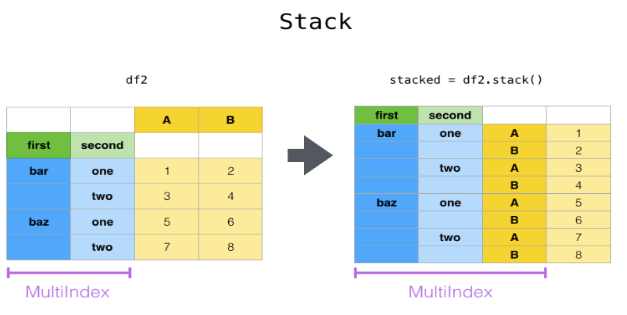

In [393]:
stacked = df2.stack()

In [394]:
stacked

first  second   
bar    one     A   -0.780237
               B    0.360396
       two     A    0.008195
               B    1.028297
baz    one     A    0.002237
               B    0.012291
       two     A   -0.928912
               B   -0.614408
dtype: float64

> "Stack된" 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.
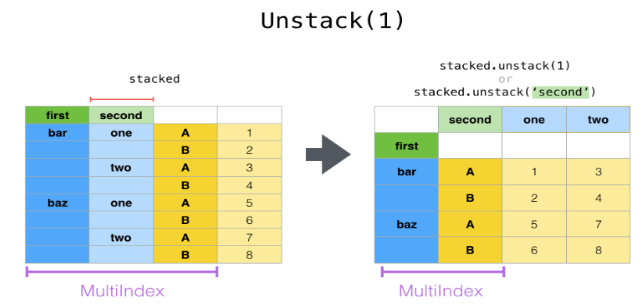

In [395]:
stacked.unstack()

A         B
first second                    
bar   one    -0.780237  0.360396
      two     0.008195  1.028297
baz   one     0.002237  0.012291
      two    -0.928912 -0.614408

In [396]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.780237  0.008195
      B  0.360396  1.028297
baz   A  0.002237 -0.928912
      B  0.012291 -0.614408

In [397]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.780237  0.002237
       B  0.360396  0.012291
two    A  0.008195 -0.928912
       B  1.028297 -0.614408

### Pivot Tables (피벗 테이블)
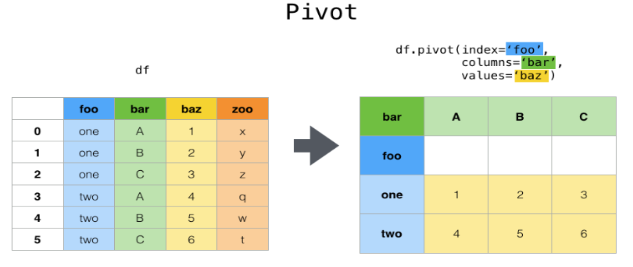

In [399]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [400]:
df

,A,B,C,D,E
0,one,A,foo,-0.357300,1.383321
1,one,B,foo,0.959188,1.884996
2,two,C,foo,-1.276771,0.326216
3,three,A,bar,-1.305453,-1.083619
4,one,B,bar,0.532812,1.194573
5,one,C,bar,0.014285,1.242526
6,two,A,foo,-0.654927,0.755316
7,three,B,foo,0.057215,-0.130739
8,one,C,foo,1.007352,0.150247
9,one,A,bar,-0.014043,-0.156415


In [401]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.014043 -0.357300
      B  0.532812  0.959188
      C  0.014285  1.007352
three A -1.305453       NaN
      B       NaN  0.057215
      C -0.112883       NaN
two   A       NaN -0.654927
      B  1.555917       NaN
      C       NaN -1.276771

## Time Series (시계열)
pandas는 자주 일어나는 변환(예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무(금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다.

In [448]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
# periods 날짜의 범위, freq : S는 초단위

In [449]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [458]:
# pd.set_option('display.max_rows', len(ts)) 
# pd.reset_option('display.max_rows')
ts

2012-01-01 00:00:00     14
2012-01-01 00:00:01    183
2012-01-01 00:00:02    332
2012-01-01 00:00:03    375
2012-01-01 00:00:04    386
                      ... 
2012-01-01 00:01:35     13
2012-01-01 00:01:36    196
2012-01-01 00:01:37    344
2012-01-01 00:01:38    489
2012-01-01 00:01:39    181
Freq: S, Length: 100, dtype: int32

In [459]:
ts.resample('5Min').sum()

2012-01-01    26432
Freq: 5T, dtype: int32

시간대를 표현 합니다.

In [460]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [461]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [462]:
ts

2012-03-06   -0.604469
2012-03-07   -0.588138
2012-03-08   -1.311903
2012-03-09   -0.224661
2012-03-10    0.431525
Freq: D, dtype: float64

In [463]:
ts_utc = ts.tz_localize('UTC')

In [464]:
ts_utc

2012-03-06 00:00:00+00:00   -0.604469
2012-03-07 00:00:00+00:00   -0.588138
2012-03-08 00:00:00+00:00   -1.311903
2012-03-09 00:00:00+00:00   -0.224661
2012-03-10 00:00:00+00:00    0.431525
Freq: D, dtype: float64

다른 시간대로 변환

In [466]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.604469
2012-03-06 19:00:00-05:00   -0.588138
2012-03-07 19:00:00-05:00   -1.311903
2012-03-08 19:00:00-05:00   -0.224661
2012-03-09 19:00:00-05:00    0.431525
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환

In [468]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [469]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [470]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.347599
2012-02-29    1.057070
2012-03-31    0.966168
2012-04-30    1.036419
2012-05-31    0.500748
Freq: M, dtype: float64

In [471]:
# to_period() 월별 빈도
ps = ts.to_period()
ps

2012-01   -1.347599
2012-02    1.057070
2012-03    0.966168
2012-04    1.036419
2012-05    0.500748
Freq: M, dtype: float64

In [472]:
# to_timestamp() 달의 첫번째 날
ps.to_timestamp()

2012-01-01   -1.347599
2012-02-01    1.057070
2012-03-01    0.966168
2012-04-01    1.036419
2012-05-01    0.500748
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

In [476]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
# 'Q'는 분기를 의미하고, 'NOV'는 11월을 나타냅니다.
# 따라서 'Q-NOV'는 11월을 분기의 끝으로 하는 분기 주기를 의미합니다.

In [477]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [482]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [488]:
ts.tail()

1999-12-01 09:00   -0.462271
2000-03-01 09:00    1.761961
2000-06-01 09:00   -0.041132
2000-09-01 09:00   -0.638091
2000-12-01 09:00   -0.044712
Freq: H, dtype: float64

In [484]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

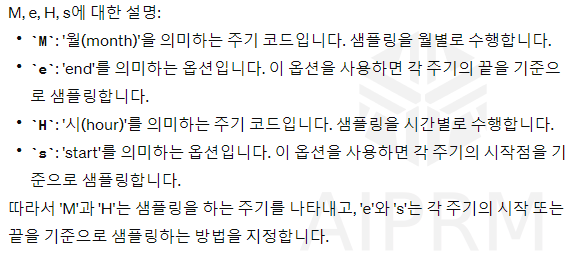

In [487]:
ts.head()

1990-03-01 09:00   -1.273079
1990-06-01 09:00   -0.536518
1990-09-01 09:00   -0.243608
1990-12-01 09:00    0.897680
1991-03-01 09:00   -0.018783
Freq: H, dtype: float64

## Categoricals (범주화)
pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다

In [637]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [638]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [639]:
df.dtypes

id            int64
raw_grade    object
dtype: object

가공하지 않은 성적을 범주형 데이터로 변환합니다.

In [640]:
df["grade"] = df["raw_grade"].astype("category")
# 컬럼 추가하면서 타입을 category

In [641]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [642]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         6 non-null      int64   
 1   raw_grade  6 non-null      object  
 2   grade      6 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 366.0+ bytes


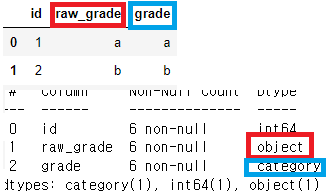

범주에 더 의미 있는 이름을 붙여주세요   
(Series.cat.categories로 할당하는 것이 적합)

In [674]:
# cat.categories 하면 오류남 .. 아니 뭐임?? ㅡ.ㅡ
df["grade"] = ['very good', 'medium', 'medium', 'very good', 'very good', 'bad']

In [644]:
#df["grade"].cat.categories = ["very good", "good", "very bad"]

In [663]:
#df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [664]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,medium
2,3,b,medium
3,4,a,very good
4,5,a,very good
5,6,e,bad


In [671]:
df.info()
#ㅋㅋㅋ 카테고리로 바꾼거 다시 object로 됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         6 non-null      int64 
 1   raw_grade  6 non-null      object
 2   grade      6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [675]:
df["grade"] = df["grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,medium
2,3,b,medium
3,4,a,very good
4,5,a,very good
5,6,e,bad


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         6 non-null      int64   
 1   raw_grade  6 non-null      object  
 2   grade      6 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 366.0+ bytes


정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

역자 주 : 131번에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열됩니다.

In [677]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,bad
1,2,b,medium
2,3,b,medium
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [678]:
df.groupby("grade").size()

grade
bad          1
medium       2
very good    3
dtype: int64

<Axes: xlabel='grade'>

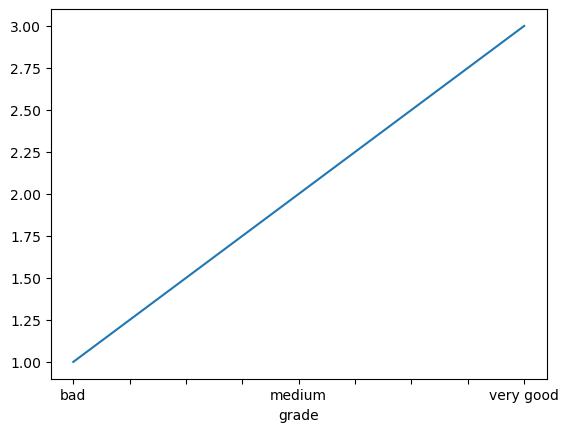

In [679]:
df.groupby("grade").size().plot.line()

## Plotting

In [683]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.561830
2000-01-02   -1.161246
2000-01-03    0.065527
2000-01-04   -0.613227
2000-01-05   -2.393719
                ...   
2002-09-22   -0.430570
2002-09-23   -1.685677
2002-09-24   -0.409039
2002-09-25   -1.266474
2002-09-26    1.394973
Freq: D, Length: 1000, dtype: float64

In [684]:
ts = ts.cumsum()
ts

2000-01-01     0.561830
2000-01-02    -0.599417
2000-01-03    -0.533890
2000-01-04    -1.147117
2000-01-05    -3.540835
                ...    
2002-09-22    24.467096
2002-09-23    22.781419
2002-09-24    22.372379
2002-09-25    21.105905
2002-09-26    22.500878
Freq: D, Length: 1000, dtype: float64

<Axes: >

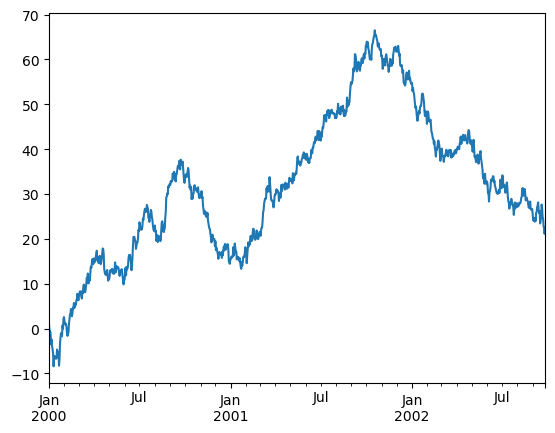

In [685]:
ts.plot()

데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

In [686]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  

In [687]:
df

,A,B,C,D
2000-01-01,-0.260143,0.688110,-0.475604,0.512997
2000-01-02,0.824662,-0.745505,-0.125142,1.102990
2000-01-03,0.927661,-0.638453,1.244344,0.169785
2000-01-04,-0.301460,-0.995106,0.710312,0.154339
2000-01-05,-0.637525,-2.966872,1.640507,0.390674
...,...,...,...,...
2002-09-22,0.369445,-1.101256,0.711617,-0.303866
2002-09-23,-1.513923,-0.422302,-0.030638,-0.110551
2002-09-24,1.608290,-0.648807,1.310697,-1.237022
2002-09-25,2.448668,-0.031164,-1.159578,0.561602


In [688]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.260143,0.688110,-0.475604,0.512997
2000-01-02,0.564519,-0.057395,-0.600746,1.615987
2000-01-03,1.492181,-0.695848,0.643598,1.785772
2000-01-04,1.190721,-1.690954,1.353910,1.940111
2000-01-05,0.553196,-4.657826,2.994417,2.330785
...,...,...,...,...
2002-09-22,-2.278119,24.505571,39.627981,17.909435
2002-09-23,-3.792042,24.083269,39.597343,17.798884
2002-09-24,-2.183752,23.434463,40.908039,16.561862
2002-09-25,0.264916,23.403298,39.748462,17.123464


<Figure size 640x480 with 0 Axes>

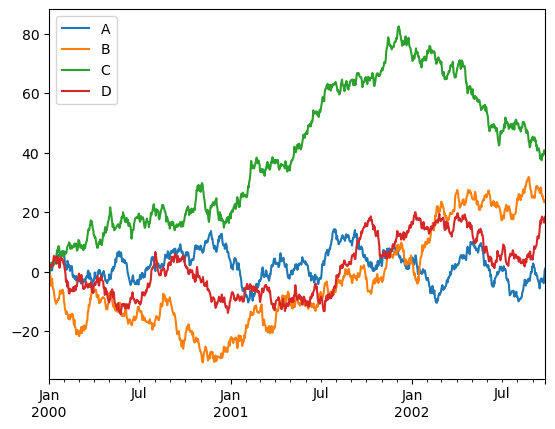

In [689]:
plt.figure();
df.plot();
plt.legend(loc='best')

## Getting Data In/Out (데이터 입/출력)
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

### CSV

In [690]:
# csv 파일에 씁니다.
df.to_csv('foo.csv')

In [691]:
# csv 파일을 읽습니다.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.260143,0.688110,-0.475604,0.512997
1,2000-01-02,0.564519,-0.057395,-0.600746,1.615987
2,2000-01-03,1.492181,-0.695848,0.643598,1.785772
3,2000-01-04,1.190721,-1.690954,1.353910,1.940111
4,2000-01-05,0.553196,-4.657826,2.994417,2.330785
...,...,...,...,...,...
995,2002-09-22,-2.278119,24.505571,39.627981,17.909435
996,2002-09-23,-3.792042,24.083269,39.597343,17.798884
997,2002-09-24,-2.183752,23.434463,40.908039,16.561862
998,2002-09-25,0.264916,23.403298,39.748462,17.123464


### HDF5

In [692]:
# HDF5 Store에 씁니다.
df.to_hdf('foo.h5', 'df')

In [693]:
# HDF5 Store에서 읽어옵니다.
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.260143,0.688110,-0.475604,0.512997
2000-01-02,0.564519,-0.057395,-0.600746,1.615987
2000-01-03,1.492181,-0.695848,0.643598,1.785772
2000-01-04,1.190721,-1.690954,1.353910,1.940111
2000-01-05,0.553196,-4.657826,2.994417,2.330785
...,...,...,...,...
2002-09-22,-2.278119,24.505571,39.627981,17.909435
2002-09-23,-3.792042,24.083269,39.597343,17.798884
2002-09-24,-2.183752,23.434463,40.908039,16.561862
2002-09-25,0.264916,23.403298,39.748462,17.123464


### Excel

In [694]:
# 엑셀 파일에 씁니다.
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [695]:
# 엑셀 파일을 읽어옵니다.
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.260143,0.688110,-0.475604,0.512997
1,2000-01-02,0.564519,-0.057395,-0.600746,1.615987
2,2000-01-03,1.492181,-0.695848,0.643598,1.785772
3,2000-01-04,1.190721,-1.690954,1.353910,1.940111
4,2000-01-05,0.553196,-4.657826,2.994417,2.330785
...,...,...,...,...,...
995,2002-09-22,-2.278119,24.505571,39.627981,17.909435
996,2002-09-23,-3.792042,24.083269,39.597343,17.798884
997,2002-09-24,-2.183752,23.434463,40.908039,16.561862
998,2002-09-25,0.264916,23.403298,39.748462,17.123464


## Gotchas (잡았다!)

연산을 수행하기 위해 시도하면 다음과 같은 예외 상황을 볼 수도 있습니다.

In [696]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

이러한 경우에는, any(), all() or empty 등을 사용해서 무엇을 원하는지를 선택(반영)해주어야 합니다.

In [698]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
